# Class 9: Solving Systems of Nonlinear Equations with Newton-type Methods
CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; University of Notre Dame

## 9a. Motivation

In this class, we will learn about a family of algorithms that quickly and reliably converges to a numeric value for $x$ that satisfies $c(x) = 0$ from an initial guess $x_0$.

## 9b. Newton's Method (aka Newton-Raphson Method) with an Example

### 9b-i. Review Canonical Form

In Class 5, we discussed **canonical form**, $c(x) = 0$, for a system of linear equations. Here, $c(x)$ is a mathematical function that depends on variable $x$. $c(\cdot)$ can be linear or nonlinear. $x$ can be a scalar or vector.

We say $c(x) = 0$ is a **square system** if the number of variables equals the number of equations, i.e., there are zero degrees of freedom. In this class session, we will focus on square systems. Next class session, we will talk about optimization problems which have extra degrees of freedom (more variables than equations).

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Answer the following short answer questions below to review canonical form.
</div>

**Multiple Choice** If $x$ is a three dimensional vector and $c(x) = 0$ is a square system, then...
1. $c(x)$ returns a scalar
2. $c(x)$ returns a two dimensional vector
3. $c(x)$ returns a three dimensional vector
4. None of the above.

Record your answer as an integer in the Python variable `ans_bi1`.

In [1]:
### BEGIN SOLUTION
ans_bi1 = 3
### END SOLUTION

In [2]:
### BEGIN HIDDEN TESTS
assert ans_bi1 == 3, "A square system has the same number of equations and variables."
### END HIDDEN TESTS

We say a function is **vector valued** if it returns a vector and **scalar valued** if it returns a scalar.

**Multiple Choice** Which is the following is canonical form for the equation $x^2 - 1/x = 2$?
1. $x^2 - 1/x - 2 = 0$
2. $\frac{x^3 - 2x - 1}{x} = 0$
3. $2 x^2 - 2/x - 4 = 0$
4. All of the above are canonical form

Store your answer as an integer in the Python variable `ans_bi2`.

In [3]:
### BEGIN SOLUTION
ans_bi2 = 4
### END SOLUTION

In [4]:
### BEGIN HIDDEN TESTS
assert ans_bi2 == 4, "There are many ways to write canonical form for a system of equations"
### END HIDDEN TESTS

### 9b-ii. Main Idea Through an Example

An example is the easiest way to understand Newton methods. Let's find a root, i.e., values for $x$ that satisfy $c(x)=0$, for the following equation:

$$ c(x) = 3 x^3 + 2 x^2 - 5 x - 20 $$

**Chemical Engineering Application**: In Thermodynamcis, you will learn about cubic equations of state. These are cubic polynomials in volume $V$ (or equivalently compressibility $Z$) that accurately predict many important quantities (enthalpy, entropy, fugacity) for a wide range of mixtures. In fact, you can predict the equilibrium coefficients $K$ in flash calculations with a cubic equation of state. But we will not "steal the thunder" of cubic equations of state right now. We'll just focus on the generic math problem above for simplicity.

We will start by plotting the function $c(x)$.

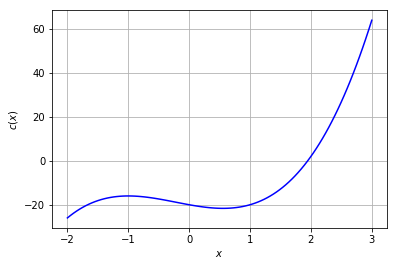

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#this next line is only needed in iPython notebooks
%matplotlib inline 

def nonlinear_function(x):
    ''' compute a nonlinear function for demonstration
    Arguments:
        x: scalar
    Returns:
        c(x): scalar
    '''
    return 3*x**3 + 2*x**2 - 5*x-20

Np = 100
X = np.linspace(-2,3,Np)
plt.plot(X,nonlinear_function(X),label="c(x)",color="blue")
plt.grid(True)
plt.xlabel("$x$")
plt.ylabel("$c(x)$")
plt.show()

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Based on the plot above, answer the following short answer questions.
</div>

**Multiple Choice** How many real and imaginary roots are there for $c(x)$?
1. One real root and two imaginary roots
2. Three real roots
3. Two real roots and one imaginary root
4. One real root and no imaginary roots
5. No real or imaginary roots
6. None of the above

Record your answer as an integer in the Python variable `ans_bii1`.

In [6]:
### BEGIN SOLUTION
ans_bii1 = 1
### END SOLUTION

In [7]:
### BEGIN HIDDEN TESTS
assert ans_bii1 == 1, "How many total roots are there for all cubic equations? How many real roots are shown in the plot?"
### END HIDDEN TESTS

**Numeric Answer** What is the real root for c(x) = 0 based on the plot? Approximate your answer to 1 decimal point and record in the Python variable `ans_bii2`.

In [8]:
### BEGIN SOLUTION
ans_bii2 = 1.9
## END SOLUTION

In [9]:
### BEGIN HIDDEN TESTS
assert ans_bii2 >= 1.7, "Your answer is too small."
assert ans_bii2 <= 2.1, "Your answer is too large."
### END HIDDEN TESTS

### 9b-iii. Algorithm Steps and Iteration 1

We will start Newton's method at the initial guess $x_0 = 1.25$.

For each iteration of the algorithm, we will do the following steps:
1. Construct a tangent line at the current guess
2. Solve the tangent line (a linear system!) to compute a new guess
3. Check if our guess is "close enough" to the true solution to stop

The Python code below does the first two steps described above. We'll talk about good stopping criteria, i.e., knowing when we are "close enough", soon.

Guess 0 = 1.25 (initial)
Guess 1 = 2.4778934700108186


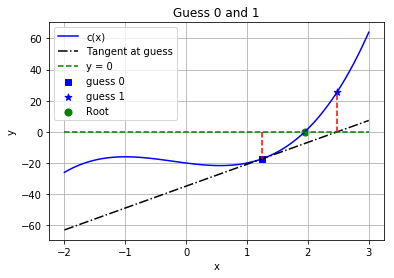

In [10]:
guess = 1.25
print("Guess 0 =",guess, "(initial)")

# plot function again
plt.plot(X,nonlinear_function(X),label="c(x)",color="blue")

# plot original guess
plt.scatter(guess,nonlinear_function(guess),label="guess 0",
            marker="s", s=30,color="blue")

### construct tangent line
# calculate slope with finite difference perturbation
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)

# plot tanget plane centered at guess
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),
         'k-.', label="Tangent at guess")

### calculate new guess and plot
new_guess = guess-nonlinear_function(guess)/slope
plt.scatter(new_guess,nonlinear_function(new_guess),label="guess 1",
            marker="*", s=50,color="blue")
print("Guess 1 =",new_guess)

### draw lines to guide eye
# horizontal line at y=0
plt.plot(X,0*X,"--",label="y = 0",color="green")

# vertical line from guess to y=0 line
plt.plot(np.array([guess,guess]),
         np.array([0,nonlinear_function(guess)]),'r--')

# vertical line from new_guess to y=0 line
plt.plot(np.array([new_guess,new_guess]),
         np.array([0,nonlinear_function(new_guess)]),'r--')

# root for c(x)=0
plt.scatter(1.94731,0,label="Root", s=50, color="green")

### finish formatting plot
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1")
plt.grid(True)
plt.show()

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Study the Python code above. Then fill in the $?$s in the formulas below. These are the calculations done in Python.
</div>

Approximate the slope of the tangent line:

$$s = \frac{c(x_0) - c(?)}{?}$$

Compute the next guess:

$$x_1 = ? - \frac{?}{?}$$

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Write one question or observation to share during class about the code above.
</div>

Your question/observation:

Turn in these two home activities on **Gradescope**. You may either enter your answer in this notebook or record on paper.

### 9b-iv. Convergence

*Are we there yet?* There are two popular stopping criteria for Newton's method:
1. Check the (norm of the) step size $\Delta x_i = x_i - x_{i-1}$. When our guess only changes by a very small amount, we should stop. We either arrived at the solution or should try something else.
2. Check the (norm of the) residual(s) $c(x_i)$.  When the (norm of the) residual(s) is almost zero, then $x_i$ is a good numeric approximation to the true (analytic) solution.

Here $x_i$ is the guess after iteration $i$. We called our initial guess $x_0$. Recall, $x$ can be a vector and $c(x)$ can be a vector valued function, hence the "(norm of the)" above.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Based on the graph above, answer the following short answer questions.
</div>

**Numeric Answer**: What is $c(x_1)$, i.e., $c(\cdot)$ evaluated at guess 1? Record your answer with two significant digits in the Python variable <tt>ans_biv1</tt>. *Hint*: You can read this off of the plot in 9b-iii.

In [11]:
### BEGIN SOLUTION
ans_biv1 = nonlinear_function(2.4778934700108186)
print("Answer =",ans_biv1)
### END SOLUTION

Answer = 25.532915745237332


In [12]:
### BEGIN HIDDEN TESTS
assert ans_biv1 >= 21.0, "Your answer is too low."
assert ans_biv1 <= 30.0, "Your answer is too high."
### END HIDDEN TESTS

**Numeric Answer**: What is $\Delta x_1 = x_1 - x_0$, i.e., $c(\cdot)$ evaluated at guess 1? Record your answer with three significant digits in the Python variable <tt>ans_biv2</tt>.

In [13]:
### BEGIN SOLUTION
ans_biv2 = 2.4778934700108186 - 1.25
print("delta x =",ans_biv2)
### END SOLUTION

delta x = 1.2278934700108186


In [14]:
### BEGIN HIDDEN TESTS
assert ans_biv2 > 1.20, "Your answer is too small."
assert ans_biv2 < 1.25, "Your answer is too large."
### END HIDDEN TESTS

### 9b-v. Iteration 2

Based on the large residual and large step size, we decide to continue with Newton's method. We proceed to i) fit the tangent line around $x_1$, and then use the tangent line to calculate $x_2$. Please take a few minutes to read through the Python code below.

Guess 1 = 2.4778934700108186
Guess 2 = 2.0535383605864483


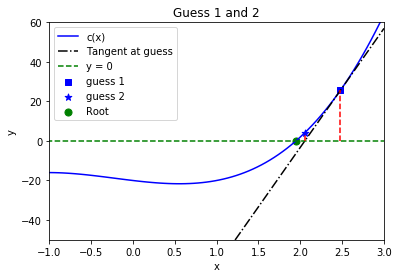

In [15]:
guess = new_guess
print("Guess 1 =",guess)

# plot function again
plt.plot(X,nonlinear_function(X),label="c(x)",color="blue")

# plot original guess
plt.scatter(guess,nonlinear_function(guess),label="guess 1",
            marker="s", s=30,color="blue")

### construct tangent line
# calculate slope with finite difference perturbation
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)

# plot tanget plane centered at guess
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),
         'k-.', label="Tangent at guess")

### calculate new guess and plot
new_guess = guess-nonlinear_function(guess)/slope
plt.scatter(new_guess,nonlinear_function(new_guess),
            label="guess 2",marker="*", s=50,color="blue")
print("Guess 2 =",new_guess)

### draw lines to guide eye
# horizontal line at y=0
plt.plot(X,0*X,"--",label="y = 0",color="green")

# vertical line from guess to y=0 line
plt.plot(np.array([guess,guess]),
         np.array([0,nonlinear_function(guess)]),'r--')

# vertical line from new_guess to y=0 line
plt.plot(np.array([new_guess,new_guess]),
         np.array([0,nonlinear_function(new_guess)]),'r--')

# root for c(x)=0
plt.scatter(1.94731,0,label="Root", s=50, color="green")

### finish formatting plot
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.axis([-1,3,-50,60])
plt.show()

## 9c. Newton's Method Generalized

### 9c-i. Generalization

As you can see, we get closer to the root each iteration.  This is due to the fact that close enough to a point, the tangent line is a reasonable approximation--just as the linear Taylor series can be a good approximation.  Of course, this is not always a good approximation as we will see later.

The basic idea is to compute where the tangent line crosses the $x$ axis. We do this by solving

$$f'(x_i) = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i},$$ with $f(x_{i+1}) = 0$ to get

$$ x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}.$$

It's that simple.

**Notice**: We switch from $c(x) = 0$ to $f(x) = 0$. People use them **interchangeably for canonical form**.

### 9c-ii. Algorithm and Implementation

We can now implement a general purpose version of Newton's method in Python.


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Fill in the missing line in the general single-variable Newton's method function below.
</div>

Hints:
* Which formula (written above) should you use to update `x` each iteration?
* Read the document string.
* `f` and `fprime` are both functions. Review Class 3 for more information on passing functions as an input argument to functions.

In [16]:
def newton(f,fprime,x0,epsilon=1.0e-6, LOUD=False, max_iter=50):
    """Find the root of the function f(x) via Newton-Raphson method
    Args:
        f: the function, in canoncial form, we want to fix the root of [Python function]
        fprime: the derivative of f [Python function]
        x0: initial guess [float]
        epsilon: tolerance [float]
        LOUD: toggle on/off print statements [boolean]
        max_iter: maximum number of iterations [int]
        
    Returns:
        estimate of root [float]
    """
    
    assert callable(f), "Warning: 'f' should be a Python function"
    assert callable(fprime), "Warning: 'fprime' should be a Python function"
    assert type(x0) is float or type(x0) is int, "Warning: 'x0' should be a float or integer"
    assert type(epsilon) is float, "Warning: 'eps' should be a float"
    assert type(max_iter) is int, "Warning: 'max_iter' should be an integer"
    assert max_iter >= 0, "Warning: 'max_iter' should be non-negative"
    
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    converged = False
    
    # Check if the residual is close enough to zero
    while (not converged and iterations < max_iter):
        
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",f(x),"/",
                  fprime(x),"=",x - f(x)/fprime(x))
        
        ### BEGIN SOLUTION
        x = x - f(x) / fprime(x)
        ### END SOLUTION
        
        # check if converged
        if np.fabs(f(x)) < epsilon:
            converged = True
        
        iterations += 1 
    print("It took",iterations,"iterations")
    
    if not converged:
        print("Warning: Not a solution. Maximum number of iterations exceeded.")
    return x #return estimate of root

### 9c-iii. Unit Test and Example

We created a function. We should immediately test it. Recall our test problem:

$$ c(x) = 3 x^3 + 2 x^2 - 5 x - 20 $$

Our friends at Wolframalpha.com tell us the roots are $x \approx 1.9473$ and $x \approx -1.3070 \pm 1.3097 i$ where $i = \sqrt{-1}$. Because we know the solution, we can use this as a unit test. We will only focus on real roots in this class.

To apply Newton's method, we need the first derivative to create the tangent line:

$$c'(x) = 9 x^2 + 4 x - 5$$

In [17]:
def Dnonlinear_function(x):
    ''' compute 1st derivative of nonlinear function for demonstration
    Arguments:
        x: scalar
    Returns:
        c'(x): scalar
    '''
    return 9*x**2 + 4*x - 5

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: How could we use a lambda function instead of a <tt>def</tt> function for the derivative calculation? Give it a try below.
</div>

In [18]:
Donlinear_function = lambda x : 9*x**2+4*x-5
print(Donlinear_function(1))

8


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Run the code to verify your modifications to <tt>newton</tt> are correct.
</div>

In [19]:
root = newton(nonlinear_function,Dnonlinear_function,-1.5,LOUD=True,max_iter=15)
print("The root estimate is",root,"\nf(",root,") =",nonlinear_function(root))

x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.25 = 0.45945945945945943
x_ 2 = 0.45945945945945943 - -21.584111503760884 / -1.2622352081811545 = -16.64045295295295
x_ 3 = -16.64045295295295 - -13206.446010659996 / 2420.5802585031524 = -11.184552053047796
x_ 4 = -11.184552053047796 - -3911.2567600472344 / 1076.1096334338297 = -7.54992539557002
x_ 5 = -7.54992539557002 - -1159.3159776918205 / 477.81265972577813 = -5.123627234367753
x_ 6 = -5.123627234367753 - -345.3883141179978 / 210.7694953933235 = -3.484925611661592
x_ 7 = -3.484925611661592 - -105.25615528465704 / 90.36265622268793 = -2.320106429882939
x_ 8 = -2.320106429882939 - -35.100340028952424 / 34.165618894325654 = -1.2927478991471761
x_ 9 = -1.2927478991471761 - -16.675175982276617 / 4.869782580156233 = 2.131465750600949
x_ 10 = 2.131465750600949 - 7.479645608829035 / 44.41417921626759 = 1.963059044886359
x_ 11 = 1.963059044886359 - 0.5864442011938849 / 37.53464350293673 = 1.9474349667957278
x_ 12 = 1.9474349667957278 - 0.004789634744607

You should see the following output:
```
x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.25 = 0.45945945945945943
x_ 2 = 0.45945945945945943 - -21.584111503760884 / -1.2622352081811545 = -16.64045295295295
x_ 3 = -16.64045295295295 - -13206.446010659996 / 2420.5802585031524 = -11.184552053047796
x_ 4 = -11.184552053047796 - -3911.2567600472344 / 1076.1096334338297 = -7.54992539557002
x_ 5 = -7.54992539557002 - -1159.3159776918205 / 477.81265972577813 = -5.123627234367753
x_ 6 = -5.123627234367753 - -345.3883141179978 / 210.7694953933235 = -3.484925611661592
x_ 7 = -3.484925611661592 - -105.25615528465704 / 90.36265622268793 = -2.320106429882939
x_ 8 = -2.320106429882939 - -35.100340028952424 / 34.165618894325654 = -1.2927478991471761
x_ 9 = -1.2927478991471761 - -16.675175982276617 / 4.869782580156233 = 2.131465750600949
x_ 10 = 2.131465750600949 - 7.479645608829035 / 44.41417921626759 = 1.963059044886359
x_ 11 = 1.963059044886359 - 0.5864442011938849 / 37.53464350293673 = 1.9474349667957278
x_ 12 = 1.9474349667957278 - 0.004789634744607696 / 36.92226641627101 = 1.947305244673835
It took 12 iterations
The root estimate is 1.947305244673835 
f( 1.947305244673835 ) = 3.2858902798693634e-07
```

The autograder will now verify your function `newton` works for this test problem.

In [20]:
### BEGIN HIDDEN TESTS
def f_test(x):
    #compute a nonlinear function for demonstration
    return 3*x**3 + 2*x**2 - 5*x-20

def df_test(x):
    #compute a nonlinear function for demonstration
    return 9*x**2 + 4*x - 5

root_test = newton(f_test,df_test,-1.5,LOUD=False,max_iter=15)

assert np.abs(root_test - 1.947305244673835) < 1E-4, "Your function newton did not work for the test cubic."
### END HIDDEN TESTS

It took 12 iterations


Let's look at what happened.  We had a bad initial guess so the method went the wrong way at first, but it eventually honed in on the solution. This highlights a feature of open methods: the root estimate can get worse, and even diverge. This is in comparison with closed methods (such as bisection) where the root is confined to an interval. On the other hand, open methods only require an initial guess instead of knowledge of an interval where the root lies. 

Run the code below to see what happens when we exceed the number if iterations.

In [21]:
root = newton(nonlinear_function,Dnonlinear_function,-1.5,LOUD=True,max_iter=3)
print("The root estimate is",root,"\nf(",root,") =",nonlinear_function(root))

x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.25 = 0.45945945945945943
x_ 2 = 0.45945945945945943 - -21.584111503760884 / -1.2622352081811545 = -16.64045295295295
x_ 3 = -16.64045295295295 - -13206.446010659996 / 2420.5802585031524 = -11.184552053047796
It took 3 iterations
The root estimate is -11.184552053047796 
f( -11.184552053047796 ) = -3911.2567600472344


You should get:

```
x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.25 = 0.45945945945945943
x_ 2 = 0.45945945945945943 - -21.584111503760884 / -1.2622352081811545 = -16.64045295295295
x_ 3 = -16.64045295295295 - -13206.446010659996 / 2420.5802585031524 = -11.184552053047796
It took 3 iterations
Warning: Not a solution. Maximum number of iterations exceeded.
The root estimate is -11.184552053047796 
f( -11.184552053047796 ) = -3911.2567600472344
```


The next bit of code demonstrates graphically what happened in the Newton solve.

### 9c-iv. Looking Deeper into the Unit Test

**Warning 1:** You must rerun the following three cells in order and only once. If you want to rerun a cell (say Iteration 3), you must start with Iteration 1 and rerun them in order.

**Warning 2:** Make sure your modification to `newton` is correct. Otherwise, the code below will not work correctly.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Run the code below.
</div>

#### Iteration 1

Initial Guess = -1.5


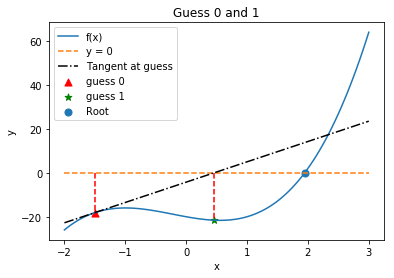

In [22]:
X = np.linspace(-2,3,Np)
plt.plot(X,nonlinear_function(X),label="f(x)")
guess = -1.5
print("Initial Guess =",guess)
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),'k-.', label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,nonlinear_function(guess),label="guess 0",c="red", marker="^", s=50)
new_guess = guess-nonlinear_function(guess)/slope
plt.scatter(new_guess,nonlinear_function(new_guess),marker="*", label="guess 1",c="green", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1")
plt.show()

#### Iteration 2

Guess 1 = 0.4592158749161699
Guess 2 = -16.591800422397238


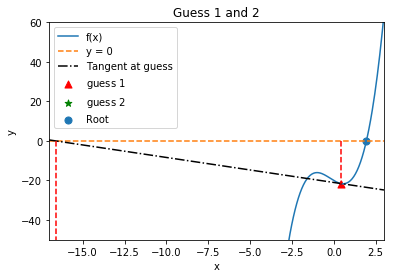

In [23]:
X = np.linspace(-17,3,400)
guess = new_guess
print("Guess 1 =",guess)
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)
plt.plot(X,nonlinear_function(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),'k-.', label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,nonlinear_function(guess),label="guess $1$",c="red",marker="^", s=50)
new_guess = guess-nonlinear_function(guess)/slope
print("Guess 2 =",new_guess)
plt.scatter(new_guess,nonlinear_function(new_guess),marker="*",label="guess $2$",c="green", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.axis([-17,3,-50,60])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.show()

#### Iteration 3

Guess 2 = -16.591800422397238
Guess 3 = -11.152177441789688


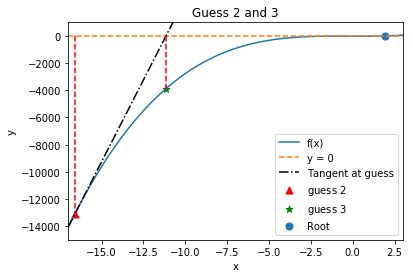

In [24]:
X = np.linspace(-17,3,400)
guess = new_guess
print("Guess 2 =",guess)
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)
plt.plot(X,nonlinear_function(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),'k-.', label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,nonlinear_function(guess),label="guess $2$",c="red",marker="^", s=50)
new_guess = guess-nonlinear_function(guess)/slope
print("Guess 3 =",new_guess)
plt.scatter(new_guess,nonlinear_function(new_guess),marker="*",label="guess $3$",c="green", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.axis([-17,3,-15000,1000])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 2 and 3")
plt.show()

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Fill in 2 or 3 observations here.
</div>

**Describe your observations here:**
1. Fill in...
2. Fill in...
3. Optional...

In hindsight, it's pretty amazing that it actually found the root.  This demonstrates that method has some robustness.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Share your observations with a partner. Then we'll regroup and discuss as a class.
</div>

## 9d. Inexact Newton

What if we do not know the derivative of the function?  We can do what is called inexact Newton and estimate the derivative using a **finite difference formula**:

$$f'(x_i) \approx \frac{f(x_i + \delta) - f(x_i)}{\delta},$$ 

which will converge to the derivative as $\delta \rightarrow 0$. Indeed, the limit of this approximation as $\delta \rightarrow 0$ is the definition of a derivative. To implement this we need to only make a small change to the code to estime the derivative instead of calling a derivative function.  The downside is that we need an extra function evaluation to estimate the derivative.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Finish the function below. Hint: You'll find the formula above helpful.
</div>

In [25]:
-

### 9d-i. Unit Test

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
    <b>Home Activity</b>: Now test your code using the unit test below. Then speculate as to how many times your code evaluated the nonlinear function.
</div>

In [26]:
root = inexact_newton(nonlinear_function,-1.5,delta = 1.0e-7, epsilon=1.0e-6, LOUD=True,max_iter=15)

x0 = -1.5
x_ 1 = -1.5 - -18.125 / 9.249998846883045 = 0.45945970372823863
x_ 2 = 0.45945970372823863 - -21.58411181208517 / -1.2622315992416588 = -16.640501844574604
x_ 3 = -16.640501844574604 - -13206.564357107398 / 2420.594719296787 = -11.184584647108327
x_ 4 = -11.184584647108327 - -3911.2918349345796 / 1076.1160501715494 = -7.54994706846515
x_ 5 = -7.54994706846515 - -1159.3263333064642 / 477.81551529624267 = -5.123641734726272
x_ 6 = -5.123641734726272 - -345.39137036052114 / 210.77077121844923 = -3.4849355309967853
x_ 7 = -3.4849355309967853 - -105.25705162502234 / 90.36323575628558 = -2.320113900340418
x_ 8 = -2.320113900340418 - -35.10059526280932 / 34.16589905214096 = -1.2927563234406585
x_ 9 = -1.2927563234406585 - -16.675217007438032 / 4.869943950325251 = 2.1313522859252334
x_ 10 = 2.1313522859252334 - 7.47460644110005 / 44.40937431127168 = 1.9630408301341777
x_ 11 = 1.9630408301341777 - 0.5857605234894905 / 37.533928995969745 = 1.9474346695440516
x_ 12 = 1.9474346695440516 

Notice that we get the same answer and it took the same number of iterations as `newton`.

The autograder will now test the `inexact_newton` code.

In [27]:
### BEGIN HIDDEN TESTS
def f_test(x):
    #compute a nonlinear function for demonstration
    return 3*x**3 + 2*x**2 - 5*x-20

def df_test(x):
    #compute a nonlinear function for demonstration
    return 9*x**2 + 4*x - 5

root_test = inexact_newton(f_test,-1.5,LOUD=False,max_iter=15)

assert np.abs(root_test - 1.947305244673835) < 1E-4, "Your function newton did not work for the test cubic."
### END HIDDEN TESTS

It took 12 iterations


Notice that we get the same answer and it took the same number of iterations.

**Discussion Question**: How many times did ``inexact_newton`` evaluate $c(x)$ for the unit test above?

## 9e. Secant Method

The secant method is a variation on the theme of Newton's method. In this case we use the previous two guesses to construct the slope:

$$f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}}.$$ 

The benefit of this is that it **does not require an additional function evaluation**. This will be a big savings if it takes a long time to do a function evaluation. One issue is that we need two points to get started.  Therefore, we can use **inexact Newton for the first step** and then **use secant from then on**.  Below is a graphical example.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, walk through the example below. Flip a figurative coin to decide who is "Partner A" and who is "Partner B".
</div>

### 9e-i. Iteration 1

Inexact Newton Step

Initial Guess = 1.3


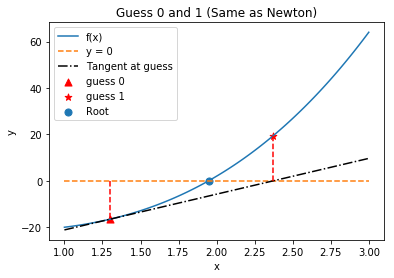

In [28]:
X = np.linspace(1,3,Np)
plt.plot(X,nonlinear_function(X),label="f(x)")
guess = 1.3
print("Initial Guess =",guess)
slope = (nonlinear_function(guess) - nonlinear_function(guess-.0001))/(.0001)
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(guess) + slope*(X-guess),'k-.', label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,nonlinear_function(guess),label="guess 0",c="red", marker="^", s=50)
new_guess = guess-nonlinear_function(guess)/slope
plt.scatter(new_guess,nonlinear_function(new_guess),marker="*",label="guess 1",c="red", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1 (Same as Newton)")
plt.savefig("Secant-Methods1.pdf")
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Partner A: Describe in a few sentences the lines and points on the plot. What are the most important features?
</div>

### 9d-ii. Iteration 2

Secant Method

Guess 1 = 2.3727105503764285
Guess 2 = 1.7925464201668238


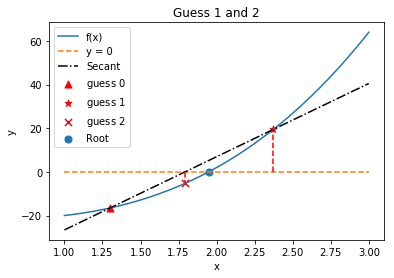

In [29]:
old_guess = guess
guess = new_guess
print("Guess 1 =",guess)
slope = (nonlinear_function(guess)-nonlinear_function(old_guess))/(guess - old_guess)
plt.plot(X,nonlinear_function(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,nonlinear_function(old_guess) + slope*(X-old_guess),'k-.', label="Secant")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(old_guess,nonlinear_function(old_guess),label="guess $0$",c="red", marker="^", s=50)
plt.scatter(guess,nonlinear_function(guess),marker="*",label="guess $1$",c="red", s=50)
new_guess = guess-nonlinear_function(guess)/slope
print("Guess 2 =",new_guess)
plt.scatter(new_guess,nonlinear_function(new_guess),marker="x", label="guess $2$",c="red", s=50)
plt.plot(np.array([new_guess,new_guess]),np.array([0,nonlinear_function(new_guess)]),'r--')
plt.scatter(1.94731,0,label="Root", s=50)
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.savefig("Secant-Methods2.pdf")
plt.show()

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Swith roles! Partner B: Describe in a few sentences the lines and points on the plot. What are the most important features?
</div>

### 9e-iii. Secant Method Algorithm

We can now generalize the secant method (similar to inexact Newton).

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Run the code below.
</div>

In [30]:
def secant(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of
        x0: initial guess
        delta: finite difference parameter
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
    x = x0
    if (LOUD):
        print("x0 =",x0)
    
    #first time use inexact Newton
    x_old = x
    fold = f(x_old)
    fx = fold
    slope = (f(x_old+delta) - fold)/delta
    x = x - fold/slope
    if (LOUD):
        print("Inexact Newton\nx_",1,"=",x,"-",fx,"/",slope,"=",
              x - fx/slope,"\nStarting Secant")
    fx = f(x)
    iterations = 1 
    
    # now switch to secant method
    while (np.fabs(fx) > epsilon):
        # recall fx, x correspond with the last point,
        # fold, and x_old correspond to the 2nd to last point
        ### SWITCH ROLES. Discuss this line in depth.
        slope = (fx - fold)/(x - x_old)
        
        # switch the history. overwrite fold with fx, etc.
        fold = fx
        x_old = x
        if (LOUD):
            print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        
        # calculate new point
        x = x - fx/slope
        
        # evaluate function f at new point
        fx = f(x)
        iterations += 1
    print("It took",iterations,"iterations")
    return x #return estimate of root

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: As a class, discuss the output below.
</div>

In [31]:
root = secant(nonlinear_function,-1.5,LOUD=True)

x0 = -1.5
Inexact Newton
x_ 1 = 0.45945970372823863 - -18.125 / 9.249998846883045 = 2.4189194074564773 
Starting Secant
x_ 2 = 0.45945970372823863 - -21.58411181208517 / -1.7653396012704734 = -11.767146325248616
x_ 3 = -11.767146325248616 - -4572.272414110397 / 372.19554564146875 = 0.517451025937337
x_ 4 = 0.517451025937337 - -21.636092826944633 / 370.4343081984803 = 0.5758583935814591
x_ 5 = 0.5758583935814591 - -21.64317999154791 / -0.1213402501968484 = -177.79183045192954
x_ 6 = -177.79183045192954 - -16795875.77015077 / 94164.21906726681 = 0.5760882386351796
x_ 7 = 0.5760882386351796 - -21.643113428270524 / 94164.09772754615 = 0.5763180832782079
x_ 8 = 0.5763180832782079 - -21.643046105986738 / 0.29290342772317585 = 74.46772411503576
x_ 9 = 74.46772411503576 - 1249567.865555407 / 16911.161604699413 = 0.5775978916445297
x_ 10 = 0.5775978916445297 - -21.642657354146493 / 16911.454507939132 = 0.5788776548573265
x_ 11 = 0.5788776548573265 - -21.64224503667768 / 0.32218262307570056 = 67

Secant is not quite as good as Newton (it took an additional iteration), but it does not need to know the derivative. Additionally, as mentioned above, there are fewer function evaluations (per iteration) than inexact Newton.

## 9f. Things that can slow convergence

Newton's method, including it's inexact variant, and the secant method can both converge slowly in the presence of the following:
<ul>
<li>Multiple roots or closely spaced roots
<li>Complex roots
<li>Bad initial guess (we saw this one already in the example where the guesses went the wrong way at first)
</ul>

<div style="background-color: rgba(255,0,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Note</b>: There are no Home Activities in this section. We will walk through the examples quickly in class together.
</div>

### 9f-i. Example 1: Multiple Roots, overlapping

The function $$f(x) = x^7$$ has multiple roots at 0. Let's see how it converges with Newton.

Notice I switch from $c(x) = 0$ to $f(x) = 0$. People use them interchangeably for canonical form.

In [32]:
# define function
mult_root = lambda x: 1.0*x**7

# define first derivative
Dmult_root = lambda x: 7.0*x**6

# solve with Newton's method
root = newton(mult_root,Dmult_root,1.0,epsilon=1.0e-12,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 1.0
x_ 1 = 1.0 - 1.0 / 7.0 = 0.8571428571428572
x_ 2 = 0.8571428571428572 - 0.33991667708911394 / 2.7759861962277634 = 0.7346938775510204
x_ 3 = 0.7346938775510204 - 0.11554334736330486 / 1.1008713373781547 = 0.6297376093294461
x_ 4 = 0.6297376093294461 - 0.03927511069548781 / 0.43657194805493627 = 0.5397750937109538
x_ 5 = 0.5397750937109538 - 0.013350265119917321 / 0.1731311002086809 = 0.4626643660379604
x_ 6 = 0.4626643660379604 - 0.004537977757820996 / 0.0686585063310034 = 0.3965694566039661
x_ 7 = 0.3965694566039661 - 0.0015425343201428206 / 0.027227866546925984 = 0.3399166770891138
x_ 8 = 0.3399166770891138 - 0.0005243331403988625 / 0.01079774024099974 = 0.29135715179066896
x_ 9 = 0.29135715179066896 - 0.00017822957877208114 / 0.004282053979924045 = 0.2497347015348591
x_ 10 = 0.2497347015348591 - 6.058320617519827e-05 / 0.0016981318199673287 = 0.2140583156013078
x_ 11 = 0.2140583156013078 - 2.0593242130478076e-05 / 0.0006734272130863475 = 0.18347855622969242
x_ 12 = 0.183478

### 9f-ii. Example 2: Multiple roots, spaced far apart

Now consider

$$f(x) = \sin(x),$$

which has multiple roots that are spaced far apart. We'll see Newton's method converge fast in this case.

In [33]:
# define function
mult_root = lambda x: np.sin(x)

# define derivative
Dmult_root = lambda x: np.cos(x)

# call Newton's method
root = newton(mult_root,Dmult_root,1.0,LOUD=True, epsilon=1e-12)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 1.0
x_ 1 = 1.0 - 0.8414709848078965 / 0.5403023058681398 = -0.5574077246549021
x_ 2 = -0.5574077246549021 - -0.5289880970896319 / 0.8486292436261492 = 0.06593645192484066
x_ 3 = 0.06593645192484066 - 0.06588868458420974 / 0.9978269796130803 = -9.572191932508134e-05
x_ 4 = -9.572191932508134e-05 - -9.572191917890302e-05 / 0.9999999954186571 = 2.923566201412306e-13
It took 4 iterations
The root estimate is 2.923566201412306e-13 
f( 2.923566201412306e-13 ) = 2.923566201412306e-13


### 9f-iii. Example 3: Complex roots near the real root

For the case of complex roots let's consider a function that has complex roots near the actual root.  One such function is
$$ f(x) = x(x-1)(x-3) + 3.$$
The derivative of this function is 
$$ f'(x) =3x^3 - 8x  + 3.$$
The root is at $x= -0.546818$.

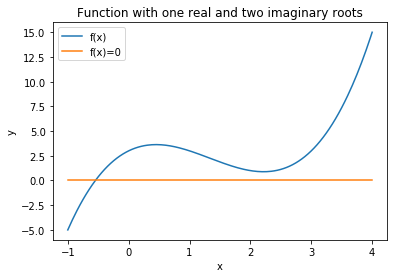

In [34]:
x = np.linspace(-1,4,200)
comp_root = lambda x: x*(x-1)*(x-3) + 3
d_comp_root = lambda x: 3*x**2 - 8*x + 3
plt.plot(x, comp_root(x),'-',label="f(x)")
plt.plot(x,0*x,label="f(x)=0")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function with one real and two imaginary roots")
plt.show()

In [35]:
root = newton(comp_root,d_comp_root,2.0,LOUD=True)
print("The root estimate is",root,"\nf(",root,") =",mult_root(root))

x0 = 2.0
x_ 1 = 2.0 - 1.0 / -1.0 = 3.0
x_ 2 = 3.0 - 3.0 / 6.0 = 2.5
x_ 3 = 2.5 - 1.125 / 1.75 = 1.8571428571428572
x_ 4 = 1.8571428571428572 - 1.1807580174927113 / -1.5102040816326543 = 2.6389961389961383
x_ 5 = 2.6389961389961383 - 1.4385483817495095 / 2.780932752940469 = 2.1217062547914827
x_ 6 = 2.1217062547914827 - 0.9097213333636254 / -0.4687377434679618 = 4.062495845646789
x_ 7 = 4.062495845646789 - 16.218911005018263 / 20.01165072251795 = 3.2520224254422248
x_ 8 = 3.2520224254422248 - 4.845718347978311 / 8.71077016319959 = 2.69573196464577
x_ 9 = 2.69573196464577 - 1.6091181327603166 / 3.235056758472666 = 2.1983316861047486
x_ 10 = 2.1983316861047486 - 0.8881406969735082 / -0.08866688244154908 = 12.21493171215154
x_ 11 = 12.21493171215154 - 1265.3500398359906 / 352.89421650036365 = 8.629296185493123
x_ 12 = 8.629296185493123 - 373.6072839850617 / 157.35988848695354 = 6.255074345497114
x_ 13 = 6.255074345497114 - 109.99716055272572 / 70.33727043911153 = 4.691221215200477
x_ 14 = 

This converged slowly. This is because the complex roots at $x=2.2734\pm0.5638 i$ make the slope of the function change so that tangents don't necessarily point to a true root. 

We can see this graphically by looking at each iteration.

#### Iteration 1

Initial Guess = 2


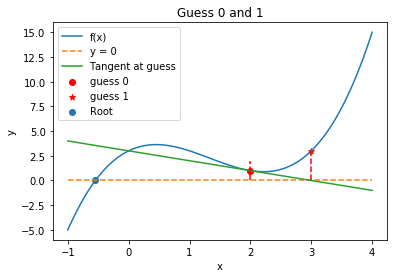

In [36]:
X = np.linspace(-1,4,Np)
plt.plot(X,comp_root(X),label="f(x)")
guess = 2
print("Initial Guess =",guess)
slope = d_comp_root(guess)
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,nonlinear_function(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess 0",c="red")
new_guess = guess-comp_root(guess)/slope
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess 1",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 0 and 1")
plt.show()

#### Iteration 2

Guess 1 = 3.0
Guess 2 = 2.5


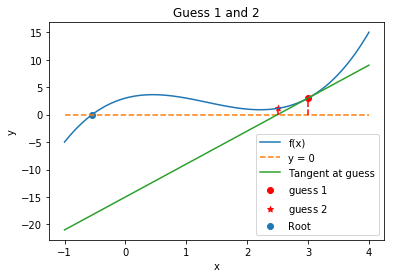

In [37]:
guess = new_guess
print("Guess 1 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $1$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 2 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $2$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 1 and 2")
plt.show()

#### Iteration 3

Guess 2 = 2.5
Guess 3 = 1.8571428571428572


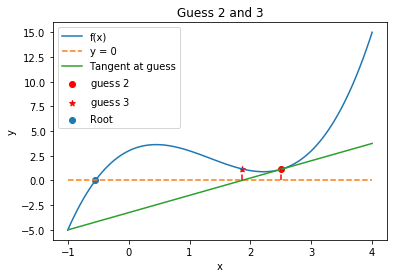

In [38]:
guess = new_guess
print("Guess 2 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $2$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 3 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $3$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 2 and 3")
plt.show()

Guess 3 = 1.8571428571428572
Guess 4 = 2.6389961389961383


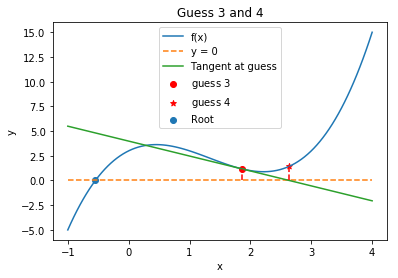

In [39]:
guess = new_guess
print("Guess 3 =",guess)
slope = d_comp_root(guess)
plt.plot(X,comp_root(X),label="f(x)")
plt.plot(X,0*X,"--",label="y = 0")
plt.plot(X,comp_root(guess) + slope*(X-guess), label="Tangent at guess")
plt.plot(np.array([guess,guess]),np.array([0,comp_root(guess)]),'r--')
plt.scatter(guess,comp_root(guess),label="guess $3$",c="red")
new_guess = guess-comp_root(guess)/slope
print("Guess 4 =",new_guess)
plt.scatter(new_guess,comp_root(new_guess),marker="*",label="guess $4$",c="red")
plt.plot(np.array([new_guess,new_guess]),np.array([0,comp_root(new_guess)]),'r--')
plt.scatter(-0.546818,0,label="Root")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Guess 3 and 4")
plt.show()

Notice that the presence of the complex root causes the solution to oscillate around the local minimum of the function. Eventually, the method will converge on the root, but it takes many iterations to do so. The upside, however, is that it does eventually converge.

## 9g. Newton's Method for Systems of Equations

### 9g-i. Motivation: Flash Problem Revisited

Recall the flash problem from Class 5:

![flash](https://drive.google.com/uc?export=view&id=13bA4DluGCQJzLueoGeL-yS3HDYinZXV5)

**Parameters (given)**:
* $F$ feed inlet flowrate, mol/time or kg/time
* $z_1$ composition of species 1 in feed, mol% or mass%
* $z_2$ composition of species 2 in feed, mol% or mass%
* $K_1$ partion coefficient for species 1, mol%/mol% or mass% / mass%
* $K_2$ partion coefficient for species 2, mol%/mol% or mass% / mass%

**Variables (unknown)**:
* $L$ liquid outlet flowrate, mol/time or kg/time
* $x_1$ composition of species 1 in liquid, mol% or mass%
* $x_2$ composition of species 2 in liquid, mol% or mass%
* $V$ vapor outlet flowrate, mol/time or kg/time
* $y_1$ composition of species 1 in vapor, mol% or mass%
* $y_2$ composition of species 2 in vapor, mol% or mass%

How to solve the flash problem and other multidimensional problem with $n$ unknown variables and $n$ nonlinear equations?

### 9g-ii. Extending Newton's Method to Multiple Dimensions

Say that we have a function of $n$ variables $\mathbf{x} = (x_1, \dots x_n):$ 
$$\mathbf{F}(\mathbf{x}) = \begin{pmatrix}f_1(x_1,\dots,x_n)\\ \vdots \\ f_n(x_1,\dots,x_n)
\end{pmatrix},$$the root is $\mathbf{F}(\mathbf{x}) = \mathbf{0}.$ For this scenario we know longer have a tangent line at point $\mathbf{x}$, rather we have an $n$-dimensional tangent vector that is defined using the Jacobian matrix
$$ \mathbf{J}(\mathbf{x}) =  \begin{pmatrix}\frac{\partial f_1}{\partial x_1}(x_1,\dots,x_n)& \dots & \frac{\partial f_1}{\partial x_n}(x_1,\dots,x_n)\\
\vdots & & \vdots\\
\frac{\partial f_n}{\partial x_1}(x_1,\dots,x_n)& \dots & \frac{\partial f_n}{\partial x_n}(x_1,\dots,x_n)
\end{pmatrix},$$
to define the tangent vector as $\mathbf{J}(\mathbf{x})\mathbf{x}$. Now we reformulate Newton's method for a single equation 
$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)},$$
as
$$f'(x_i)(x_{i+1} - x_i) = - f(x_i).$$
The multidimensional analog of this is 
$$\mathbf{J}(\mathbf{x}_i)(\mathbf{x}_{i+1} - \mathbf{x}_{i}) = -\mathbf{F}(\mathbf{x}_i).$$ Note this is a linear system of equations to solve to get a vector of changes for each $x$: $\pmb{\delta} = \mathbf{x}_{i+1} - \mathbf{x}_{i}.$ Therefore, in each step we solve the system
$$\mathbf{J}(\mathbf{x}_i)\pmb{\delta} = -\mathbf{F}(\mathbf{x}_i),$$
and set
$$\mathbf{x}_{i+1} = \mathbf{x}_i + \pmb{\delta}.$$
In multidimensional root finding we can observe the importance of having a small number of iterations: we need to solve a linear system of equations at each iteration. If this system is large, the time to find the root could be prohibitively long. 

To demonstrate how Newton's method works for a multi-dimensional function.

### 9g-iii. Two Phase, Single Feed Phase Problem

#### Mathematical Model

Feed Specifications: $F = 1.0$ mol/s, $z_1$ = 0.5 mol/mol, $z_2$ = 0.5 mol/mol

Given Equilibrium Data: $K_1$ = 3 mol/mol, $K_2$ = 0.05 mol/mol

Overall Material Balance

$$F = L + V$$

Component Mass Balances

$$V y_1 + L x_1 = F z_1$$

$$V y_2 + L x_2 = F z_2$$

Thermodynamic Equilibrium

$$y_1 = K_1 x_1$$

$$y_2 = K_2 x_2$$

Summation

$$y_1 + y_2 = x_1 + x_2$$

#### Convert to Canonical Form

How to convert these equations to $\mathbf{F}(\mathbf{x}) = 0$?

$$\mathbf{F}(\mathbf{x}) = \begin{pmatrix}
L + V - F\\
Vy_1 + L x_1 - F z_1 \\
V y_2 + L x_2 - F z_2 \\
y_1 - K_1 x_1 \\
y_2 - K_2 x_2 \\
y_1 + y_2 - x_1 - x_2
\end{pmatrix},$$ with $\mathbf{x} = (L, V, x_1, x_2, y_1, y_2).$

Some people use $\mathbf{F}(\mathbf{x}) = 0$ and others use $c(x) = 0$ for canonical form. They mean the same thing.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Verify each equation in the model above was correctly transcribed into the function below.
</div>

In [40]:
def my_f(x):
    ''' Nonlinear system of equations in conancial form F(x) = 0
    Copied from Lecture 7.
    
    Arg:
        x: vector of variables
        
    Returns:
        r: residual, F(x)
    
    '''

    # Initialize residuals
    r = np.zeros(6)
    
    # given data
    F = 1.0
    z1 = 0.5
    z2 = 0.5
    K1 = 3
    K2 = 0.05
    
    # copy values from x to more meaningful names
    L = x[0]
    V = x[1]
    x1 = x[2]
    x2 = x[3]
    y1 = x[4]
    y2 = x[5]
    
    # equation 1: overall mass balance
    r[0] = V + L - F
    
    # equations 2 and 3: component mass balances
    r[1] = V*y1 + L*x1 - F*z1
    r[2] = V*y2 + L*x2 - F*z2
    
    # equation 4 and 5: equilibrium
    r[3] = y1 - K1*x1
    r[4] = y2 - K2*x2
    
    # equation 6: summation
    r[5] = (y1 + y2) - (x1 + x2)
    # This is known as the Rachford-Rice formulation for the summation constraint
    
    return r

#### Assemble Jacobian Matrix (Analytic)

The Jacobian is
$$ \mathbf{J}(\mathbf{x}) = \begin{pmatrix}
\frac{\partial f_1}{\partial L} & \frac{\partial f_1}{\partial V} & \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \frac{\partial f_1}{\partial y_1} & \frac{\partial f_1}{\partial y_2} \\
\frac{\partial f_2}{\partial L} & \frac{\partial f_2}{\partial V} & \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \frac{\partial f_2}{\partial y_1} & \frac{\partial f_2}{\partial y_2} \\
\vdots & & & & & \vdots \\
\frac{\partial f_6}{\partial L} & \frac{\partial f_6}{\partial V} & \frac{\partial f_6}{\partial x_1} & \frac{\partial f_6}{\partial x_2} & \frac{\partial f_6}{\partial y_1} & \frac{\partial f_6}{\partial y_2} \\
\end{pmatrix} $$

which evaluates to

$$ \mathbf{J}(\mathbf{x}) = \begin{pmatrix}
1 & 1 & 0 & 0 & 0 & 0\\
x_1 & y_1 & L & 0 & V & 0 \\
x_2 & y_2 & 0 & L & 0 & V \\
0 & 0 & -K_1 & 0 & 1 & 0 \\
0 & 0 & 0 & -K_2 & 0 & 1 \\
0 & 0 & -1 & -1 & 1 & 1
\end{pmatrix}.$$

We can tediously program a function to evaluate the Jacobian.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Verify the second row in the Jacobian was calculated properly. Turn this in on <b>Gradescope.</b>
</div>

In [41]:
def my_J(x):
    '''Jacobian matrix for two phase flash problem
    
    Arg:
        x: vector of variables
        
    Returns:
        J: square Jacobian matrix
    '''
    
    # allocate matrix of zeros
    J = np.zeros((6,6))
    
    # given data
    F = 1.0
    z1 = 0.5
    z2 = 0.5
    K1 = 3
    K2 = 0.05
    
    # copy values from x to more meaningful names
    L = x[0]
    V = x[1]
    x1 = x[2]
    x2 = x[3]
    y1 = x[4]
    y2 = x[5]
    
    # first row (overall material balance)
    J[0,0] = 1
    J[0,1] = 1
    
    # second row (component 1 material balance)
    J[1,0] = x1
    J[1,1] = y1
    J[1,2] = L
    J[1,4] = V
    
    # third row (component 2 material balance)
    J[2,0] = x2
    J[2,1] = y2
    J[2,3] = L
    J[2,5] = V
    
    # fourth row (equilibrium for component 1)
    J[3,2] = -K1
    J[3,4] = 1
    
    # fifth row (equilibrium for component 2)
    J[4,3] = -K2
    J[4,5] = 1
    
    # sixth row (summation equation)
    J[5,2] = -1
    J[5,3] = -1
    J[5,4] = 1
    J[5,5] = 1
    
    return J

**Unit Test**: Immediately after we create a function, we should test it. Let's reuse the same initial guess as Class 6.

$L = 0.5$, $V = 0.5$, $x_1 = 0.55$, $x_2 = 0.45$, $y_1 = 0.65$, $y_2 = 0.35$

Jacobian structure copied from above:
$$ \mathbf{J}(\mathbf{x}) = \begin{pmatrix}
1 & 1 & 0 & 0 & 0 & 0\\
x_1 & y_1 & L & 0 & V & 0 \\
x_2 & y_2 & 0 & L & 0 & V \\
0 & 0 & -K_1 & 0 & 1 & 0 \\
0 & 0 & 0 & -K_2 & 0 & 1 \\
0 & 0 & -1 & -1 & 1 & 1
\end{pmatrix}.$$

In [42]:
import numpy as np
x0 = np.array([0.5, 0.5, 0.55, 0.45, 0.65, 0.35])
print("J(x0) = \n",my_J(x0))

J(x0) = 
 [[ 1.    1.    0.    0.    0.    0.  ]
 [ 0.55  0.65  0.5   0.    0.5   0.  ]
 [ 0.45  0.35  0.    0.5   0.    0.5 ]
 [ 0.    0.   -3.    0.    1.    0.  ]
 [ 0.    0.    0.   -0.05  0.    1.  ]
 [ 0.    0.   -1.   -1.    1.    1.  ]]


#### First Iteration



In [43]:
print("F(x0) = \n",my_f(x0),"\n")
print("J(x0) = \n",my_J(x0),"\n")

F(x0) = 
 [ 0.      0.1    -0.1    -1.      0.3275  0.    ] 

J(x0) = 
 [[ 1.    1.    0.    0.    0.    0.  ]
 [ 0.55  0.65  0.5   0.    0.5   0.  ]
 [ 0.45  0.35  0.    0.5   0.    0.5 ]
 [ 0.    0.   -3.    0.    1.    0.  ]
 [ 0.    0.    0.   -0.05  0.    1.  ]
 [ 0.    0.   -1.   -1.    1.    1.  ]] 



We now need to solve the linear system:
$$\mathbf{J}(\mathbf{x}_0)\pmb{\delta}_1 = -\mathbf{F}(\mathbf{x}_0).$$

Let's use Gaussian elimination. We'll start by copying the code from Class 6:

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Please read through the docstrings for each function below. Revisit your Class 6 notes if needed.
</div>

In [44]:
import numpy as np

def BackSub(aug_matrix,z_tol=1E-8):
    """back substitute a N by N system after Gauss elimination

    Args:
        aug_matrix: augmented matrix with zeros below the diagonal [numpy 2D array]
        z_tol: tolerance for checking for zeros below the diagonal [float]
    Returns:
        x: length N vector, solution to linear system [numpy 1D array]
    """
    [Nrow, Ncol] = aug_matrix.shape
    try:
        # check the dimensions
        assert Nrow + 1 == Ncol
    except AssertionError:
        print("Dimension checks failed.")
        print("Nrow = ",Nrow)
        print("Ncol = ",Ncol)
        raise

    assert type(z_tol) is float, "z_tol must be a float"
        
    # check augmented matrix is all zeros below the diagonal
    for r in range(Nrow):
        for c in range(0,r):
            assert np.abs(aug_matrix[r,c]) < z_tol, "\nWarning! Nonzero in position "+str(r)+","+str(c)

    # create vector of zeros to store solution
    x = np.zeros(Nrow)
    
    # loop over the rows starting at the bottom
    for row in range(Nrow-1,-1,-1):
        RHS = aug_matrix[row,Nrow] # far column

        # loop over the columns to the right of the diagonal
        for column in range(row+1,Nrow):
            
            # substract, i.e., substitute the already known values
            RHS -= x[column]*aug_matrix[row,column]

        # compute the element of x corresponding to the current row
        x[row] = RHS/aug_matrix[row,row]
        
    ### END SOLUTION
    return x

def swap_rows(A, a, b):
    """Rows two rows in a matrix, switch row a with row b
    
    args: 
    A: matrix to perform row swaps on
    a: row index of matrix
    b: row index of matrix
    
    returns: nothing
    
    side effects:
    changes A to rows a and b swapped
    """
    
    # A negative index will give unexpected behavior
    assert (a>=0) and (b>=0)
    N = A.shape[0] #number of rows
    assert (a<N) and (b<N) #less than because 0-based indexing
    
    # create a temporary variable to store row a
    temp = A[a,:].copy()
    
    # move row b values into the location of row a
    A[a,:] = A[b,:].copy()
    
    # move row a values (stored in temp) into the location of row a
    A[b,:] = temp.copy()
    
def GaussElimPivotSolve(A,b,LOUD=False):
    """create a Gaussian elimination with pivoting matrix for a system

    Args:
        A: N by N array
        b: array of length N
    Returns:
        solution vector in the original order
    """
    
    # checks dimensions
    [Nrow, Ncol] = A.shape
    assert Nrow == Ncol
    N = Nrow
    
    
    #create augmented matrix
    aug_matrix = np.zeros((N,N+1))
    aug_matrix[0:N,0:N] = A
    aug_matrix[:,N] = b
    #augmented matrix is created
    
    #create scale factors 
    s = np.zeros(N)
    count = 0
    for row in aug_matrix[:,0:N]: #don't include b
        s[count] = np.max(np.fabs(row))
        count += 1
  
    # print diagnostics if requested
    if LOUD:
        print("s =",s)
        print("Original Augmented Matrix is\n",aug_matrix)
    
    #perform elimination
    for column in range(0,N):
        
        ## swap rows if needed
        # find largest position
        largest_pos = (np.argmax(np.fabs(aug_matrix[column:N,column]/
                                         s[column:N])) + column)
        
        # check if current column is largest position
        if (largest_pos != column):
            # if not, swap rows
            if (LOUD):
                print("Swapping row",column,"with row",largest_pos)
                print("Pre swap\n",aug_matrix)
            swap_rows(aug_matrix,column,largest_pos)
            
            #re-order s
            tmp = s[column]
            s[column] = s[largest_pos]
            s[largest_pos] = tmp
            if (LOUD):
                print("A =\n",aug_matrix)
                print("new_s =\n", s)
        
        #finish off the row
        for row in range(column+1,N):
            mod_row = aug_matrix[row,:]
            mod_row = mod_row - mod_row[column]/aug_matrix[column,column]*aug_matrix[column,:]
            aug_matrix[row] = mod_row
    
    #now back solve
    if LOUD:
        print("Final aug_matrix is\n",aug_matrix)
    x = BackSub(aug_matrix)
    return x

And now let's solve the linear system, copied again for clarity:

$$\mathbf{J}(\mathbf{x}_0)\pmb{\delta}_1 = -\mathbf{F}(\mathbf{x}_0).$$

In [45]:
delta_1 = GaussElimPivotSolve(my_J(x0), -my_f(x0))
print("delta_1 =",delta_1)

delta_1 = [ 1.44067797 -1.44067797 -0.2279661   0.2279661   0.31610169 -0.31610169]


Finally, we need to calculate $\mathbf{x_1}$:

$$\mathbf{x}_1 = \mathbf{x}_0 + \pmb{\delta}_1$$

In [46]:
x1 = x0 + delta_1
print("x1 = ",x1)

x1 =  [ 1.94067797 -0.94067797  0.3220339   0.6779661   0.96610169  0.03389831]


The results for multivariate Newton's method match the single variable case. Division is replaced with solving a linear system of equations.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;"> 
<b>Home Activity</b>: Notice anything strange about $\mathbf{x}_1$? Recall that $\mathbf{x} = (L, V, x_1, x_2, y_1, y_2)$. Write a sentence below.
</div>

**Write your sentence here:** 

### 9g-iv. Finite Difference to Approximate the Jacobian Matrix

Assembling the Jacobian matrix for each problem is tedious and error prone. Instead, we can apply finite difference to each element of $\mathbf{x}$ to built the Jacobian matrix column by column.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: With a partner, use a picture of Jacobian matrix to explain the main steps of the code below.
</div>

In [47]:
def Jacobian(f,x,delta = 1.0e-7):
    '''Approximate Jacobian using forward finite difference

    Args:
        f: vector-valued function
        x: point to build approximation J(x) around
        delta: finite difference step size

    Returns:
        J: square Jacobian matrix (approximation)

    '''
    # Determine size
    N = x.size
    
    #Evaluate function f at x
    fx = f(x) #only need to evaluate this once
    
    # Make sure f is square (no. inputs = no. outputs)
    try:
        assert N == fx.size, "Your problem is not square!"
    except AssertionError:
        print("x = ",x)
        print("fx = ",fx)
    
    
    # Allocate empty matrix
    J = np.zeros((N,N))

    idelta = 1.0/delta #division is slower than multiplication
    x_perturbed = x.copy() #copy x to add delta
    
    # Loop over elements of x and columns of J
    for i in range(N):
        # Perturb (apply step) to element i of x
        x_perturbed[i] += delta
        
        # Approximate column in Jacobian
        col = (f(x_perturbed) - fx) * idelta
        
        # Reset element of x
        x_perturbed[i] = x[i]
        
        # Save results
        J[:,i] = col
    # end for loop
    return J

**Unit Test**: Immediately after we create a function, we need to test it. Let's use or flash problem as a unit test.

In [48]:
print("*** Analytic ***")
print("J(x0) = \n",my_J(x0),"\n")

print("\n\n*** Finite Difference ***")
print("J(x0) = \n",Jacobian(my_f,x0),"\n")

*** Analytic ***
J(x0) = 
 [[ 1.    1.    0.    0.    0.    0.  ]
 [ 0.55  0.65  0.5   0.    0.5   0.  ]
 [ 0.45  0.35  0.    0.5   0.    0.5 ]
 [ 0.    0.   -3.    0.    1.    0.  ]
 [ 0.    0.    0.   -0.05  0.    1.  ]
 [ 0.    0.   -1.   -1.    1.    1.  ]] 



*** Finite Difference ***
J(x0) = 
 [[ 1.    1.    0.    0.    0.    0.  ]
 [ 0.55  0.65  0.5   0.    0.5   0.  ]
 [ 0.45  0.35  0.    0.5   0.    0.5 ]
 [ 0.    0.   -3.    0.    1.    0.  ]
 [ 0.    0.    0.   -0.05  0.    1.  ]
 [ 0.    0.   -1.   -1.    1.    1.  ]] 



### 9g-v. Putting it all together: Multivariate Newton's Method

We can now stick together i) solving a linear system, and ii) finite difference into a multivariate Newton's method solver.

In [49]:
def newton_system(f,x0,exact_Jac=None,delta=1E-7,epsilon=1.0e-6, LOUD=False):
    """Find the root of the function f via exact or inexact Newton-Raphson method
    Args:
        f: function to find root of
        x0: initial guess
        exact_Jac: function to calculate J. If None, use finite difference
        delta: finite difference tolerance. Only used if J is not specified
        epsilon: tolerance
        
    Returns:
        estimate of root
    """
        
    x = x0
    if (LOUD):
        print("x0 =",x0)
    iterations = 0
    fx = f(x)
    while (np.linalg.norm(fx) > epsilon):
        if exact_Jac is None:
            # Use finite difference
            J = Jacobian(f,x,delta)
        else:
            J = exact_Jac(x)
        
        RHS = -fx;
        
        # solve linear system
        # We could have used GaussElimPivotSolve here instead
        delta_x = np.linalg.solve(J,RHS)
        
        # Check if GE returned any NaN values
        if np.isnan(delta_x).any():
            print("Gaussian Elimination Failed!")
            print("J = \n",J,"\n")
            print("J is rank",np.linalg.matrix_rank(J),"\n")
            print("RHS = ",RHS)
        x = x + delta_x
        fx = f(x)
        if (LOUD):
            print("\nIteration",iterations+1,": x =",x,"\n norm(f(x)) =",np.linalg.norm(fx))
        iterations += 1
    print("\nIt took",iterations,"iterations")
    return x #return estimate of root

### 9g-vi. Return to the Two Phase Flash Calculation

In [50]:
# First, we'll try exact Newton's method
# We give the function my_J as an input argument
xsln = newton_system(my_f,x0,exact_Jac=my_J,LOUD=True)

x0 = [0.5  0.5  0.55 0.45 0.65 0.35]

Iteration 1 : x = [ 1.94067797 -0.94067797  0.3220339   0.6779661   0.96610169  0.03389831] 
 norm(f(x)) = 1.1084980479560436

Iteration 2 : x = [0.72368421 0.27631579 0.3220339  0.6779661  0.96610169 0.03389831] 
 norm(f(x)) = 3.5551252101777283e-16

It took 2 iterations


Wow, it took Newton's method only 2 iterations to find the solution with a residual norm of 10$^{-16}$. Moreover, it recovered from a non-physical intermediate value.

Now let's try inexact Newton's method:

In [51]:
xsln = newton_system(my_f,x0,LOUD=True)

x0 = [0.5  0.5  0.55 0.45 0.65 0.35]

Iteration 1 : x = [ 1.94067797 -0.94067797  0.3220339   0.6779661   0.9661017   0.03389831] 
 norm(f(x)) = 1.1084980482929319

Iteration 2 : x = [0.72368422 0.27631579 0.3220339  0.6779661  0.96610169 0.0338983 ] 
 norm(f(x)) = 4.3810305996817624e-09

It took 2 iterations


With inexact Newton's method we also converge in two iterations with a residual norm of 10$^{-9}$.

### 9g-vii. Now let's break it

Let's try to find an initial point that breaks Newton's method. Perhaps a near single phase guess (almost all mass in liquid) with the same composition in both phases.

In [53]:
x0_break1 = np.array([0.99, 0.01, 0.5, 0.5, 0.5, 0.5])
xsln = newton_system(my_f,x0_break1,exact_Jac=my_J,LOUD=True)

x0 = [0.99 0.01 0.5  0.5  0.5  0.5 ]


LinAlgError: Singular matrix

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Why did Newton's method fail? Brainstorm ideas with a partner.
</div>

Let's try slightly different compositions in the phases.

In [52]:
x0_break2 = np.array([1.0, 0.0, 0.51, 0.49, 0.52, 0.48])
xsln = newton_system(my_f,x0_break2,exact_Jac=my_J,LOUD=True)

x0 = [1.   0.   0.51 0.49 0.52 0.48]

Iteration 1 : x = [-16.79661017  17.79661017   0.3220339    0.6779661    0.96610169
   0.03389831] 
 norm(f(x)) = 15.95834985257004

Iteration 2 : x = [0.72368421 0.27631579 0.3220339  0.6779661  0.96610169 0.03389831] 
 norm(f(x)) = 2.989908109668815e-14

It took 2 iterations


It works.

What happens if we give a negative number for a flowrate composition or initial value?

In [54]:
x0_break2 = np.array([2.0, -1.0, 0.5, 0.5, 1.5, -0.5])
xsln = newton_system(my_f,x0_break2,exact_Jac=my_J,LOUD=True)

x0 = [ 2.  -1.   0.5  0.5  1.5 -0.5]

Iteration 1 : x = [ 1.1779661  -0.1779661   0.3220339   0.6779661   0.96610169  0.03389831] 
 norm(f(x)) = 0.41378239393191524

Iteration 2 : x = [0.72368421 0.27631579 0.3220339  0.6779661  0.96610169 0.03389831] 
 norm(f(x)) = 1.2412670766236366e-16

It took 2 iterations


It still works. Rachford-Rice is pretty robust (for the selected values of $K_1$ and $K_2$).

### 9g-viii. Using ``numpy`` instead

`numpy` and `scipy` offer a few different implementations of Newton's method. However, we found these to be unreliable last semester. Instead, we recommend either using the Newton solve we put together this class session or Pyomo (next class session).